In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.visualization as visualization
import glob
import os
import time

In [6]:
# ZTF25aafnnbw = []
ZTF25aafnnbw = [i for i in glob.glob('/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/*.fits') if fits.open(i)[0].header['OBJECT'] == '1305-1025']

for i in ZTF25aafnnbw:
  hdu = fits.open(i)
  obj_0 = hdu[0].header['OBJECT']
  hdu[0].header['OBJECT'] = 'ZTF25aafnnbw'
  obj_1 = hdu[0].header['OBJECT']
  print(i,obj_0,'======>',obj_1)
  hdu.writeto(i,overwrite=True)
  hdu.close()
  # break


/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_2_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_3_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_22_1_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_22_2_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_22_3_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_23_1_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_23_2_1_9.fits 1305-1025 ======> ZTF25aafnnbw
/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_23_3_1_9.fits 1305-1025 ======> ZTF25aafnnbw


In [10]:
# x=os.system('squeue -u arikhind -j 70034')
# def clear_output(wait=False):
#     print("\033[H\033[J", end="", flush=True)
#     if wait:
#         time.sleep(0.1)
# #every 5 seconds, check if the job is done
# while True:
#     time.sleep(120)
#     os.system('squeue -j 70033')#u arikhind')
#     #clear the output in the cell
#     clear_output(wait=True)

glob.glob('/mnt/data1/users/arikhind/phot_data/ref_imgs/ztf*')

['/mnt/data1/users/arikhind/phot_data/ref_imgs/ztf_001737_zg_c11_q2_refimg_ra24.3220_dec45.7255_asec599.fits',
 '/mnt/data1/users/arikhind/phot_data/ref_imgs/ztf_001737_zi_c11_q2_refimg_ra24.3220_dec45.7255_asec599.fits',
 '/mnt/data1/users/arikhind/phot_data/ref_imgs/ztf_001737_zr_c11_q2_refimg_ra24.3220_dec45.7255_asec599.fits']

In [37]:
img = '/mnt/data1/users/arikhind/phot_data/ref_imgs/ztf_001737_zg_c11_q2_refimg_ra24.3220_dec45.7255_asec599.fits'
d = fits.open(img)#[700:800, 700:800]

d.writeto('/mnt/data1/users/arikhind/phot_data/ref_imgs/ztfg_25bbo_ref.fits', overwrite=True)

from astropy.stats import sigma_clipped_stats,sigma_clip,SigmaClip
from photutils import IRAFStarFinder,CircularAperture,CircularAnnulus,aperture_photometry,SExtractorBackground,Background2D
import statistics as stats

sig_clip = SigmaClip(sigma=3)
bkg_estimator = SExtractorBackground(sig_clip)

bkg = Background2D(d[0].data, (50, 50), filter_size=(3, 3),sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

bkg_median = []
for row in bkg.background:
    [bkg_median.append(i) for i in row]
    # row_median = stats.median(row)

bkg_median = stats.median(bkg_median)

d[0].data = d[0].data- bkg.background
bkg_update = Background2D(d[0].data, (50, 50), filter_size=(3, 3),sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
median_bkg=bkg_update.background_median

d.writeto('/mnt/data1/users/arikhind/phot_data/ref_imgs/ztfg_25bbo_ref_bkgsb.fits', overwrite=True)

/tmp/ipykernel_872105/3575520215.py:7: DeprecationWarning: `photutils.IRAFStarFinder` is a deprecated alias for `photutils.detection.IRAFStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import IRAFStarFinder` to silence this warning.
  from photutils import IRAFStarFinder,CircularAperture,CircularAnnulus,aperture_photometry,SExtractorBackground,Background2D
/tmp/ipykernel_872105/3575520215.py:7: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import IRAFStarFinder,CircularAperture,CircularAnnulus,aperture_photometry,SExtractorBackground,Background2D
/tmp/ipykernel_872105/3575520215.py:7: DeprecationWarning: `photutils.CircularAnnulus` is a deprecated alias for `photutils.aperture.CircularAnnulus` and will be removed in the future. Ins

['/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bew_g2025-02-18_72296bkgsub_scaled_subtraction.fits',
 '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bew_r2025-02-18_71869bkgsub_scaled_subtraction.fits',
 '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bew_i2025-02-18_72724bkgsub_scaled_subtraction.fits']

Text(0.5, 1.0, '2025bex_i2025-02-20_72779bkgsub_scaled_subtraction.fits')

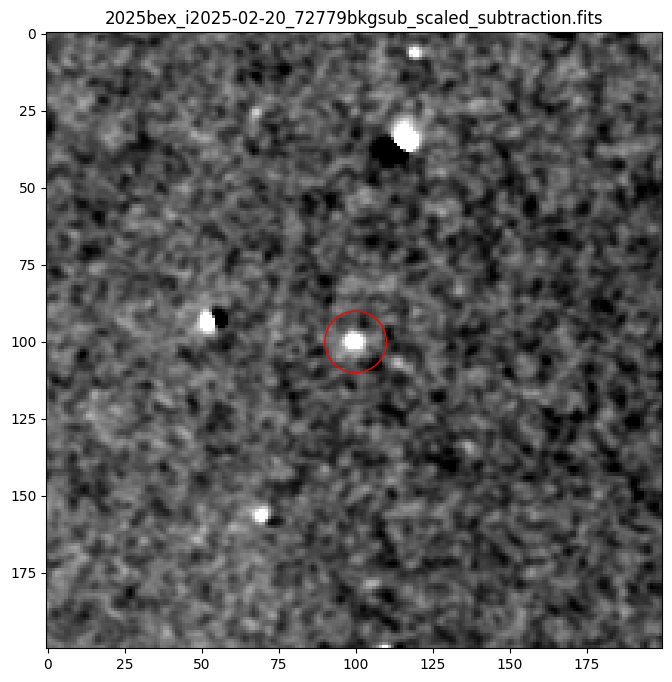

In [12]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
import numpy as np
x = glob.glob('/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bex_*2025-02-20*')

# x= ['/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bex_i2025-02-20_*']

img = x[2]

fig = plt.figure(figsize=(8, 8))
# img = '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bew_g2025-02-18_72296bkgsub_scaled_subtraction.fits'
# img = '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/AT2025bbo_r2025-02-11_72361bkgsub_scaled_subtraction.fits'
d = fits.open(img)[0].data#[700:800, 700:800]
S=100
d = d[int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S),int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S)]
vmin,vmax = ZScaleInterval().get_limits(d)
# print(np.shape(d)[0])
# plt.imshow(d[int(np.shape(d)[0]/2-50):int(np.shape(d)[0]/2+50),int(np.shape(d)[0]/2-50):int(np.shape(d)[0]/2+50)], cmap='gray', vmin=vmin, vmax=vmax)
plt.imshow(d, cmap='gray', vmin=vmin, vmax=vmax)
#plot a hollow circle at 50,50 with radius 10
plt.gca().add_artist(plt.Circle((np.shape(d)[0]/2,np.shape(d)[0]/2), 10, fill=False, edgecolor='red'))
plt.title(img.split('/')[-1])
# plt.title('AT2025bbo SDSSI, 60717.8, mag 20.5797 ± 0.41209, lim 22.1122')

['/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_g2025-02-19_85552bkgsub_scaled_subtraction.fits', '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_r2025-02-19_85623bkgsub_scaled_subtraction.fits']


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

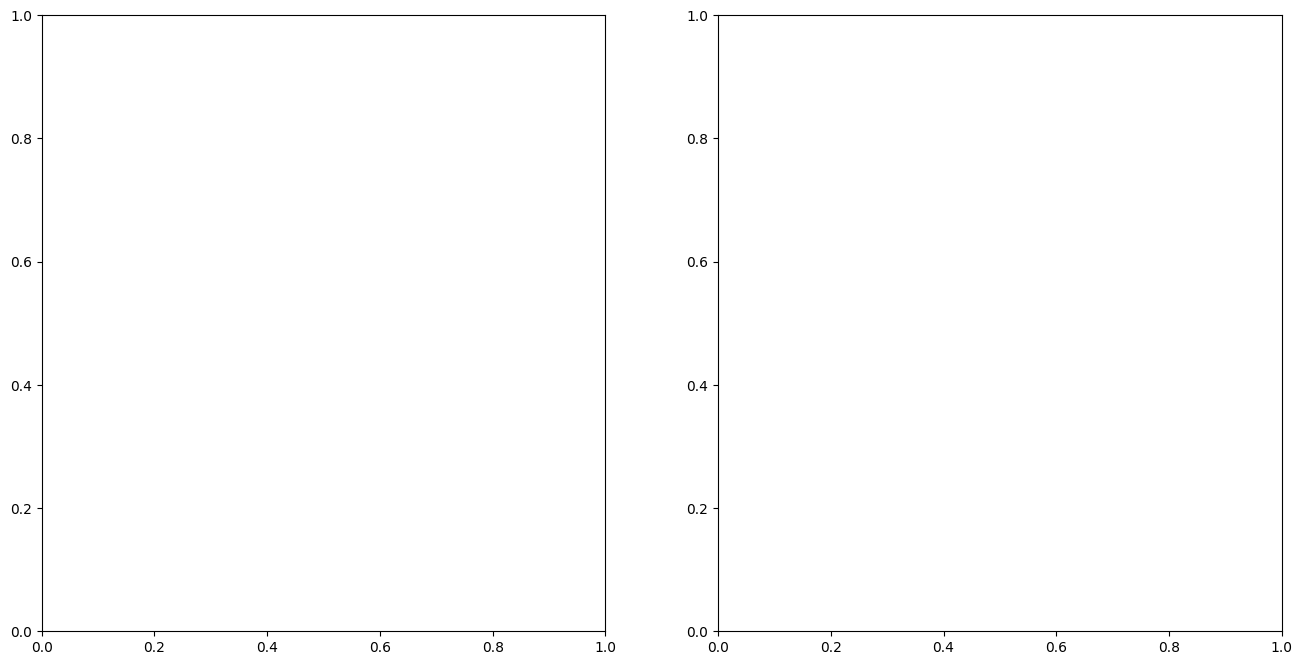

In [ ]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import glob


x = glob.glob('/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/2025bev_*2025-02-18*')

print(x)

x=['/mnt/data1/users/arikhind/phot_data/out/proto_sci_prepsfex_56715.fits','/mnt/data1/users/arikhind/phot_data/out/proto_ref_prepsfex_56715.fits']
# img = x[0]

# fig = plt.figure(figsize=(8, 8))
fig,axs = plt.subplots(1,len(x),figsize=(8*len(x), 8))

if len(x) == 1:
  axs = [axs]
S=100
for i in range(len(x)):
  img = x[i]
  d = fits.open(img)[0].data[0]#[700:800, 700:800]
  d = d[int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S),int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S)]
  vmin,vmax = ZScaleInterval().get_limits(d)
  axs[i].imshow(d, cmap='gray', vmin=vmin, vmax=vmax)
  # axs[i].add_artist(plt.Circle((np.shape(d)[0]/2,np.shape(d)[0]/2), 10, fill=False, edgecolor='red'))
  axs[i].set_title(img.split('/')[-1])

# d = fits.open(img)[0].data#[700:800, 700:800]
# S=100
# d = d[int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S),int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S)]
# vmin,vmax = ZScaleInterval().get_limits(d)
# # print(np.shape(d)[0])
# # plt.imshow(d[int(np.shape(d)[0]/2-50):int(np.shape(d)[0]/2+50),int(np.shape(d)[0]/2-50):int(np.shape(d)[0]/2+50)], cmap='gray', vmin=vmin, vmax=vmax)
# plt.imshow(d, cmap='gray', vmin=vmin, vmax=vmax)
# #plot a hollow circle at 50,50 with radius 10
# plt.gca().add_artist(plt.Circle((np.shape(d)[0]/2,np.shape(d)[0]/2), 10, fill=False, edgecolor='red'))
# plt.title(img.split('/')[-1])
# # plt.title('AT2025bbo SDSSI, 60717.8, mag 20.5797 ± 0.41209, lim 22.1122')

['/mnt/data1/users/arikhind/phot_data/ref_imgs/ZTF25aafvbeq_ref_u.fits']


AttributeError: 'Axes' object has no attribute 'flatten'

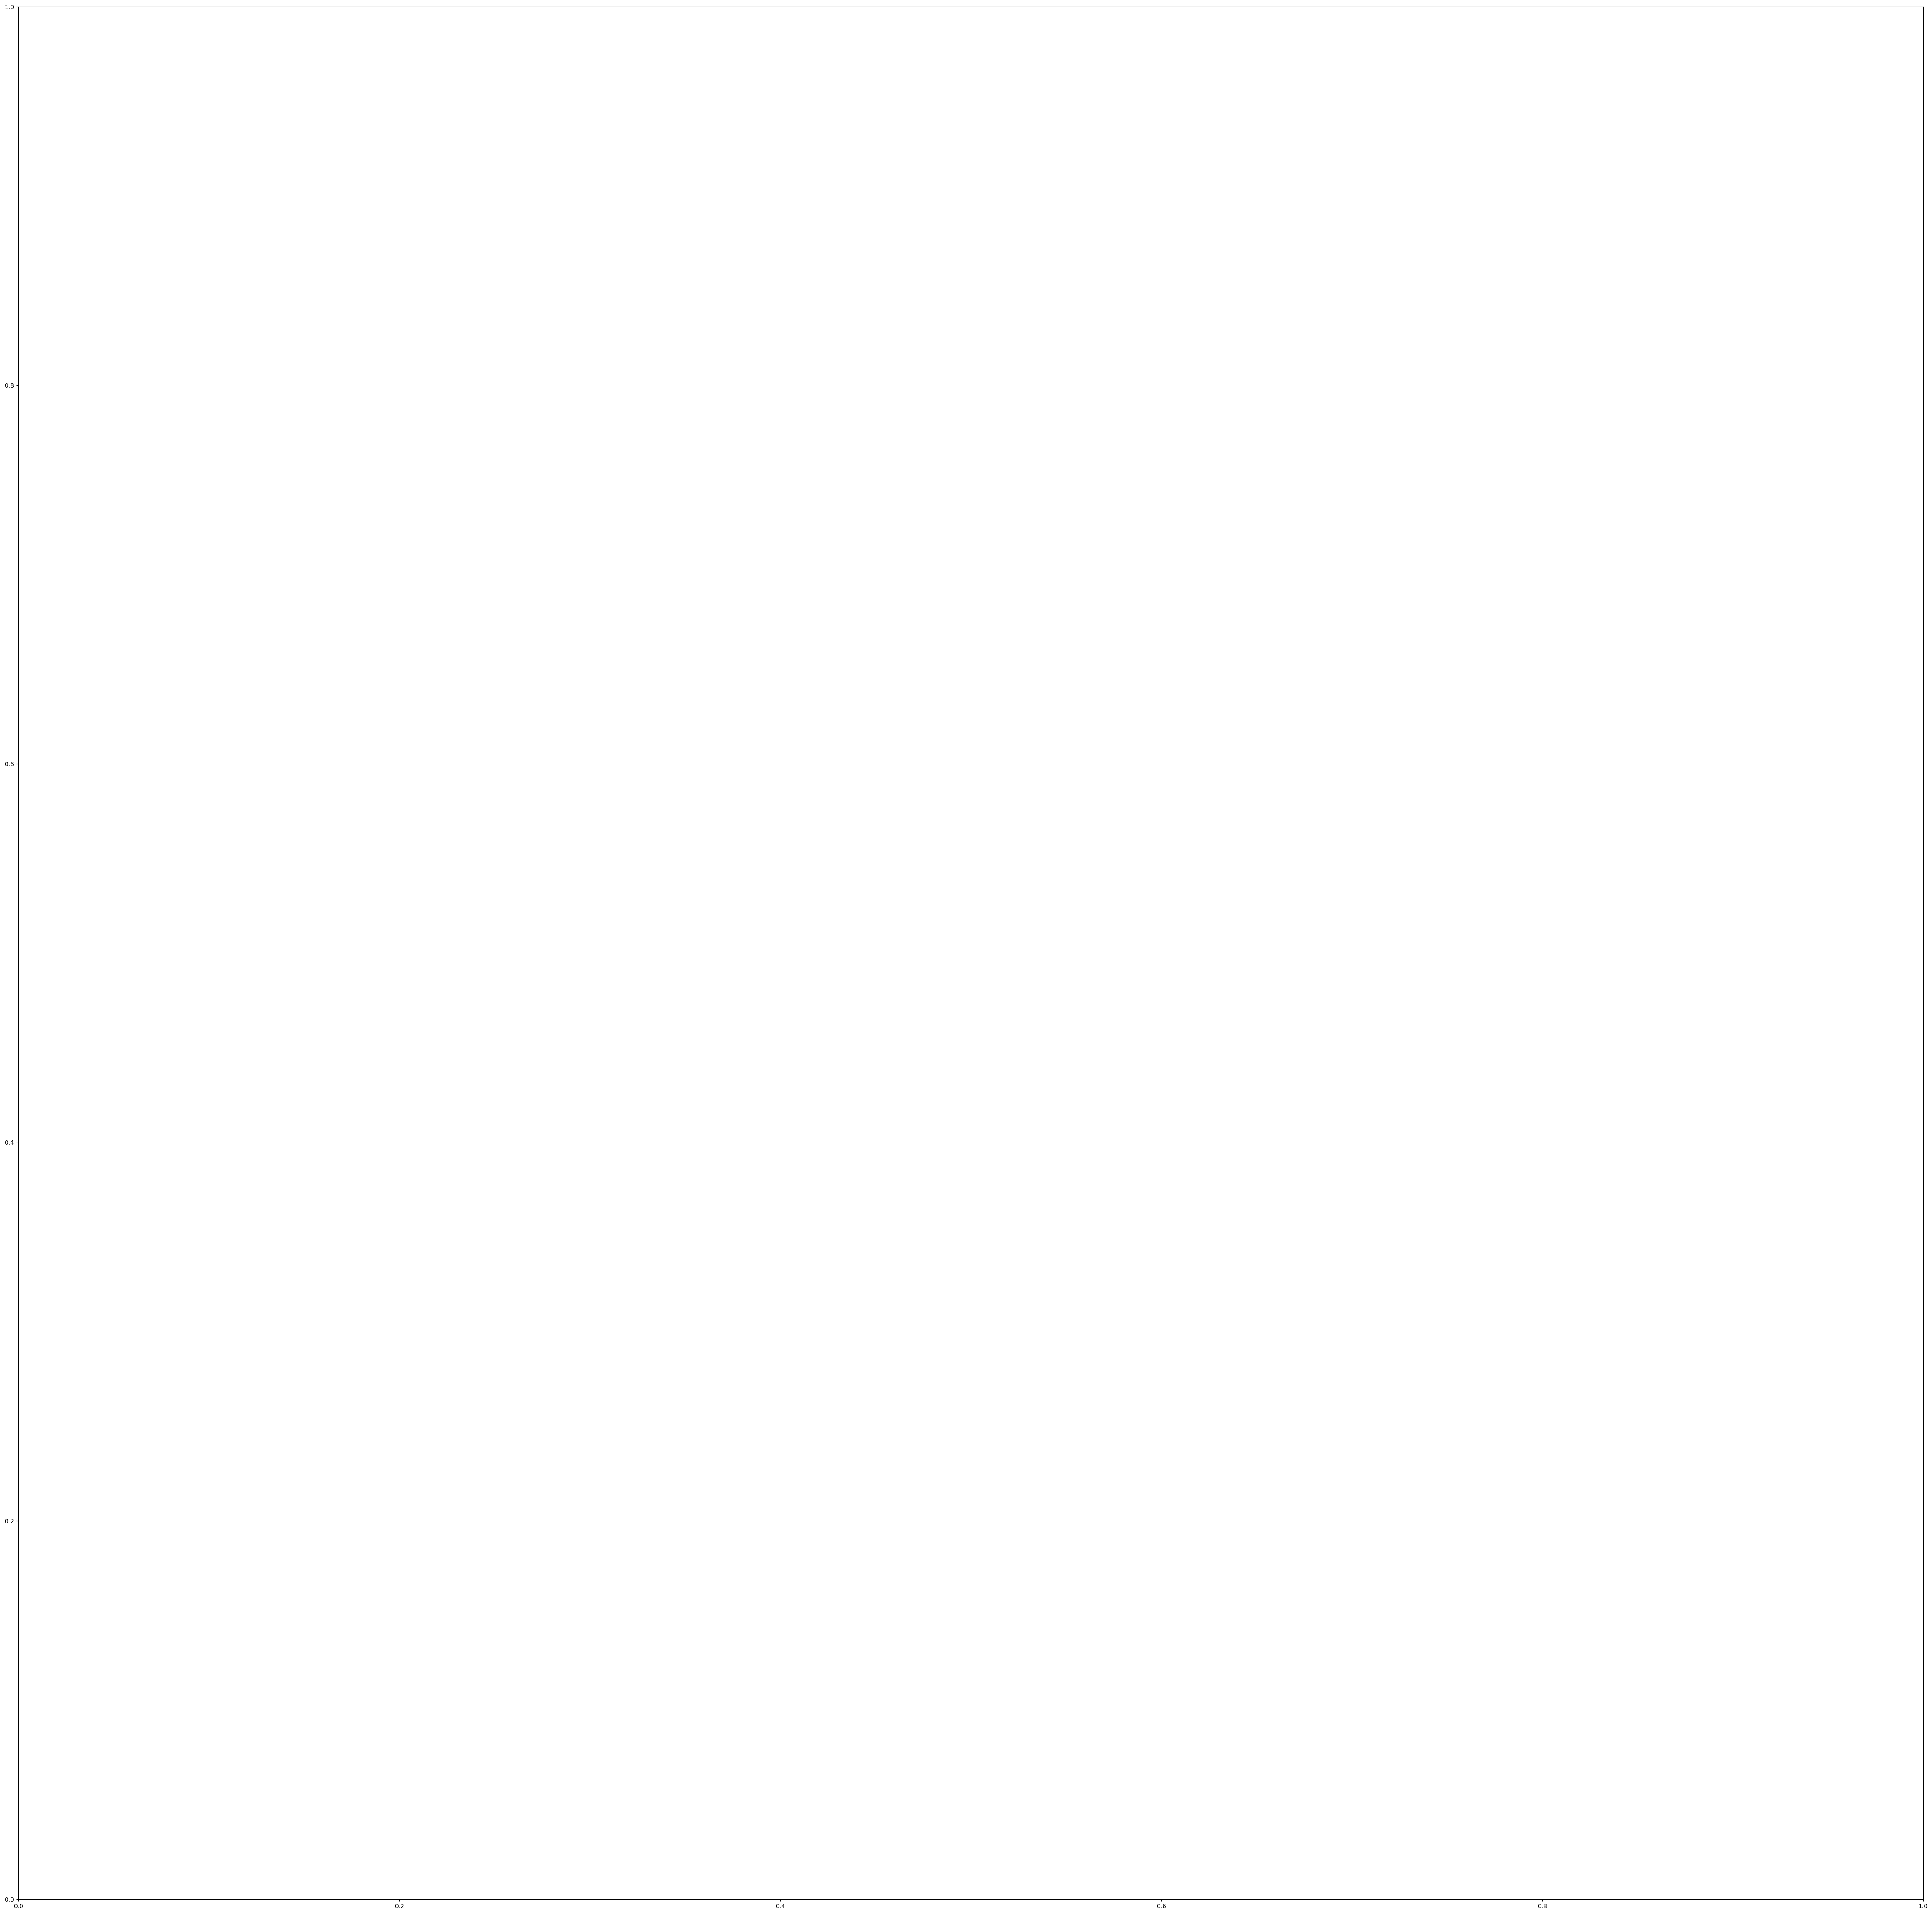

In [10]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import glob
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs


def wcs_to_pixels(filename,RA=None,DEC=None):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)    
    if RA==None:c=SkyCoord(hdulist[0].header['CAT-RA'],hdulist[0].header['CAT-DEC'],unit=(u.hourangle, u.deg),frame='fk5')
    else:c=SkyCoord(RA,DEC,unit=(u.hourangle, u.deg),frame='fk5')
    # print(c.ra,c.dec)
    coords= np.column_stack((c.ra.deg,c.dec.deg))
    w = wcs.WCS(hdulist[0].header)
    world= np.array(coords, np.float_)
    pixcrd = w.wcs_world2pix(world, 1)
    return (pixcrd)






# x = glob.glob('/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/*.fits')
# x = glob.glob('/mnt/data1/users/arikhind/phot_data/combined_imgs/2025bev*2025-02-18*')

print(x)
x = ['/mnt/data1/users/arikhind/phot_data/ref_imgs/ZTF25aafvbeq_ref_u.fits']
# x=['/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_1_1_9.fits','/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_2_1_9.fits','/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_3_1_9.fits']
# img = x[0]

# print(fits.open(x[0])[0].header)

# fig = plt.figure(figsize=(8, 8))
# fig,axs = plt.subplots(len(x)//2,len(x)//2+1,figsize=(8*len(x), 8))
#create a NxN grid of subplots
fig,axs = plt.subplots(nrows= 1, ncols=1,figsize=(8*7, 8*7))
axs = axs.flatten()
if len(x) == 1:
  axs = [axs]
S=100
cut=True
# cut=False
RADEC = '10:04:38.57 +37:04:34.56'
ra = RADEC.split(' ')[0]
dec = RADEC.split(' ')[1]

for i in range(len(x)):
  img = x[i]
  # fig,axs = plt.subplots(1,1,figsize=(8*len(x), 8))
  ax = axs[i]
  d = fits.open(img)[0].data#[700:800, 700:800]
  # if cut==True:
  #   d = d[int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S),int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S)]
  vmin,vmax = ZScaleInterval().get_limits(d)
  ax.imshow(d, cmap='gray', vmin=vmin, vmax=vmax)
  coords = wcs_to_pixels(img,RA=ra,DEC=dec)
  # print(coords)
  ax.add_artist(plt.Circle((coords[0][0],coords[0][1]), 10, fill=False, edgecolor='red'))
  if ra==None:ax.set_title(img.split('/')[-1]+' \n'+fits.open(img)[0].header['OBJECT'])
  else:ax.set_title(img.split('/')[-1]+' \n'+'2025bev')
  ax.set_xlim(int(np.shape(d)[0]/2-S),int(np.shape(d)[0]/2+S))
  ax.set_ylim(int(np.shape(d)[0]/2-S),int(np.shape(d)[0]/2+S))

# d = fits.open(img)[0].data#[700:800, 700:800]
# S=100
# d = d[int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S),int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S)]
# vmin,vmax = ZScaleInterval().get_limits(d)
# # print(np.shape(d)[0])
# # plt.imshow(d[int(np.shape(d)[0]/2-50):int(np.shape(d)[0]/2+50),int(np.shape(d)[0]/2-50):int(np.shape(d)[0]/2+50)], cmap='gray', vmin=vmin, vmax=vmax)
# plt.imshow(d, cmap='gray', vmin=vmin, vmax=vmax)
# #plot a hollow circle at 50,50 with radius 10
# plt.gca().add_artist(plt.Circle((np.shape(d)[0]/2,np.shape(d)[0]/2), 10, fill=False, edgecolor='red'))
# plt.title(img.split('/')[-1])
# # plt.title('AT2025bbo SDSSI, 60717.8, mag 20.5797 ± 0.41209, lim 22.1122')

['/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_g2025-02-19_85552bkgsub_scaled_subtraction.fits', '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_r2025-02-19_85623bkgsub_scaled_subtraction.fits', '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_i2025-02-19_85697bkgsub_scaled_subtraction.fits', '/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_z2025-02-19_85782bkgsub_scaled_subtraction.fits']
[[1290478.66626532 2019565.30205216]]
[[1290478.66626532 2019565.30205216]]


[[1290478.66626532 2019565.30205216]]
[[1290478.66626532 2019565.30205216]]


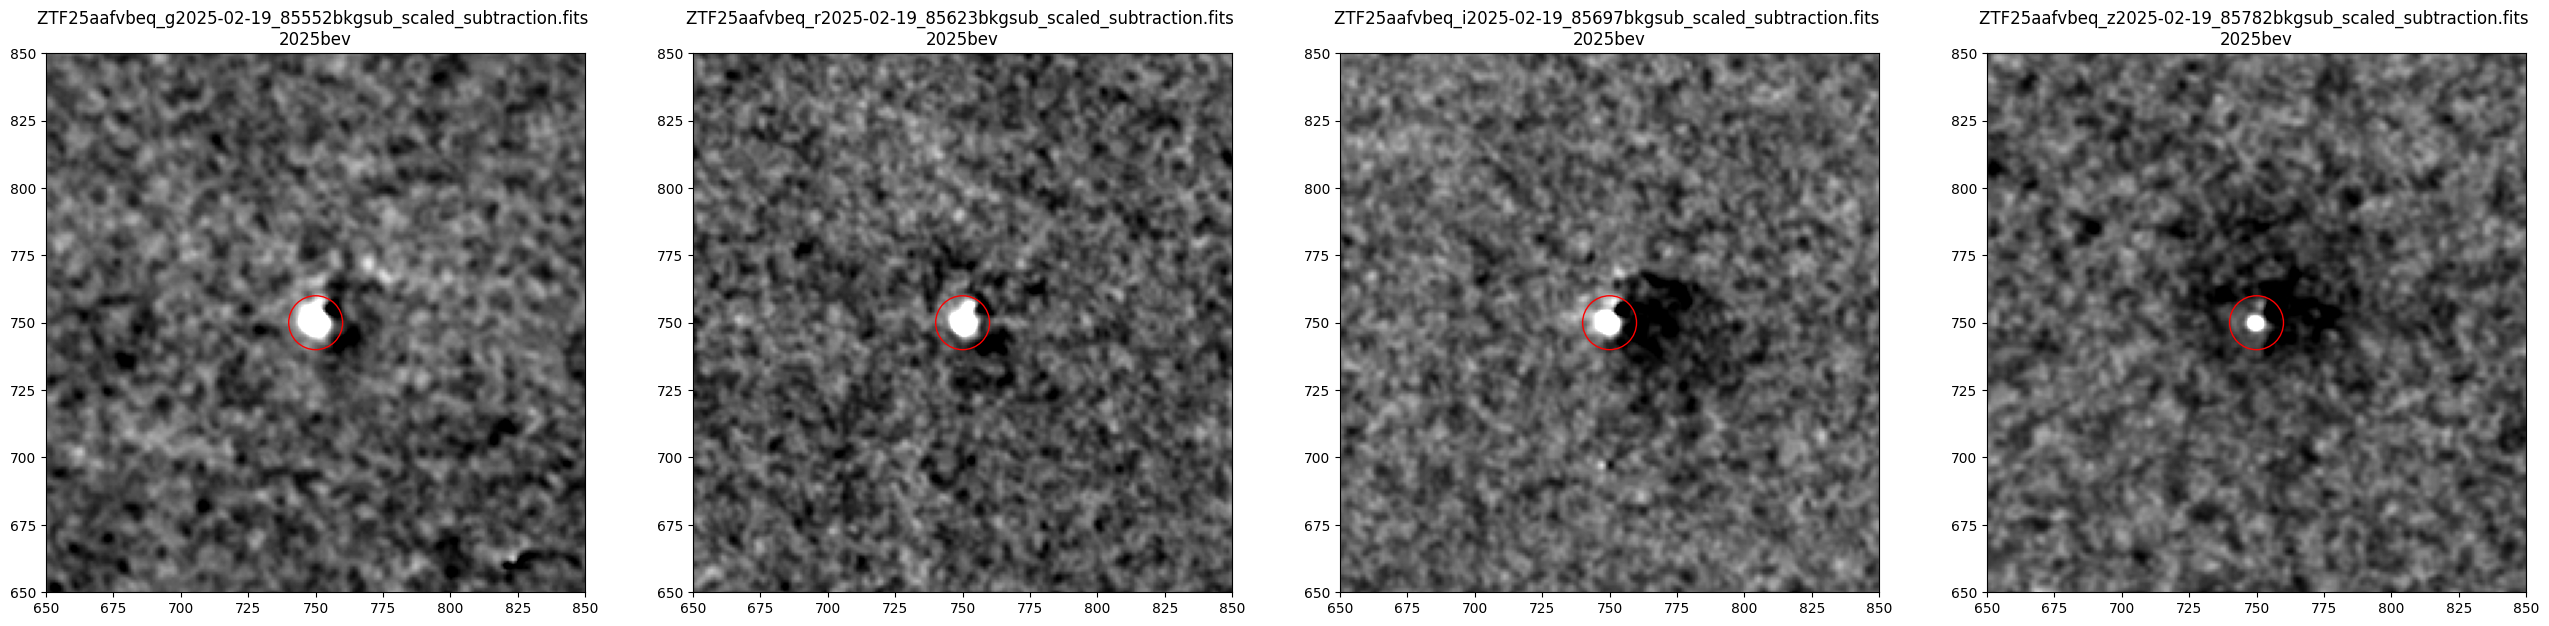

In [4]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import glob
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs


def wcs_to_pixels(filename,RA=None,DEC=None):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)    
    if RA==None:c=SkyCoord(hdulist[0].header['CAT-RA'],hdulist[0].header['CAT-DEC'],unit=(u.hourangle, u.deg),frame='fk5')
    else:c=SkyCoord(RA,DEC,unit=(u.hourangle, u.deg),frame='fk5')
    # print(c.ra,c.dec)
    coords= np.column_stack((c.ra.deg,c.dec.deg))
    w = wcs.WCS(hdulist[0].header)
    world= np.array(coords, np.float_)
    pixcrd = w.wcs_world2pix(world, 1)
    return (pixcrd)






x = glob.glob('/mnt/data1/users/arikhind/phot_data/scaled_subtracted_imgs/ZTF25aafvbeq_*2025-02-19*')
# x = glob.glob('/mnt/data1/users/arikhind/phot_data/combined_imgs/2025bev*2025-02-18*')

print(x)

# x=['/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_1_1_9.fits','/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_2_1_9.fits','/mnt/data1/users/arikhind/phot_data/Quicklook/20250218/h_e_20250218_21_3_1_9.fits']
# img = x[0]

# print(fits.open(x[0])[0].header)

# fig = plt.figure(figsize=(8, 8))
fig,axs = plt.subplots(1,len(x),figsize=(8*len(x), 8))
#create a NxN grid of subplots
# fig,axs = plt.subplots(nrows= 4, ncols=len(x)//4 +1,figsize=(8*7, 8*7))
# axs = axs.flatten()
if len(x) == 1:
  axs = [axs]
S=100
cut=True
# cut=False
RADEC = '02:00:59.10 +52:19:28.82'
ra,dec = RADEC.split(' ')
for i in range(len(x)):
  img = x[i]
  # fig,axs = plt.subplots(1,1,figsize=(8*len(x), 8))
  ax = axs[i]
  d = fits.open(img)[0].data#[700:800, 700:800]
  # if cut==True:
  #   d = d[int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S),int(np.shape(d)[0]/2-S):int(np.shape(d)[0]/2+S)]
  vmin,vmax = ZScaleInterval().get_limits(d)
  ax.imshow(d, cmap='gray', vmin=vmin, vmax=vmax)
  coords = wcs_to_pixels(img,RA=ra,DEC=dec)
  print(coords)
  ax.add_artist(plt.Circle((np.shape(d)[0]/2,np.shape(d)[0]/2), 10, fill=False, edgecolor='red'))
  if ra==None:ax.set_title(img.split('/')[-1]+' \n'+fits.open(img)[0].header['OBJECT'])
  else:ax.set_title(img.split('/')[-1]+' \n'+'2025bev')
  ax.set_xlim(int(np.shape(d)[0]/2-S),int(np.shape(d)[0]/2+S))
  ax.set_ylim(int(np.shape(d)[0]/2-S),int(np.shape(d)[0]/2+S))